In [10]:
import networkx as nx
import matplotlib
import matplotlib.pyplot as plt

G = nx.Graph()
G.add_nodes_from([0,'A',2, 3])
G.add_edge(0,'A')
print(G.nodes, G.edges)

ImportError: DLL load failed: The specified module could not be found.

In [92]:
import numpy as np

import itertools


adjacency_matrix = np.array([[0,1,1,1],[0,0,1,1],[0,0,0,1],[0,0,0,0]]).T

N = adjacency_matrix.shape[0]

noise = np.array([1, 1, 1, 1])


# check if adjacency matrix is square
assert adjacency_matrix.shape[0] == adjacency_matrix.shape[1], "Adjacency matrix is not square"

# check if adjacency matrix has no symmetric elements
for i in range(N):
    for j in range(i, N):
        assert adjacency_matrix[i,j] == 0, "Adjacency matrix is not lower triangular"



am = np.diag(np.ones(N)).astype(int)

unit = np.array([0,0,0,1])
# # exponentiate adjacency matrix
for i in range(0,N-1):
    am = am @ adjacency_matrix

    factor = np.dot(unit,am)

    nonzero_noise = noise[factor != 0]

    factor[factor != 0] += nonzero_noise
    print(factor)

[2 2 2 0]
[3 2 0 0]
[2 0 0 0]


In [76]:
noise

array([1.])

In [46]:
m = adjacency_matrix.copy()
print(m)
for i in range(3 - 1):
    m = m @ adjacency_matrix
    print(m)


[[0 0 0 0]
 [1 0 0 0]
 [1 1 0 0]
 [1 1 1 0]]
[[0 0 0 0]
 [0 0 0 0]
 [1 0 0 0]
 [2 1 0 0]]
[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [1 0 0 0]]


In [71]:
runs[0,:].T

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

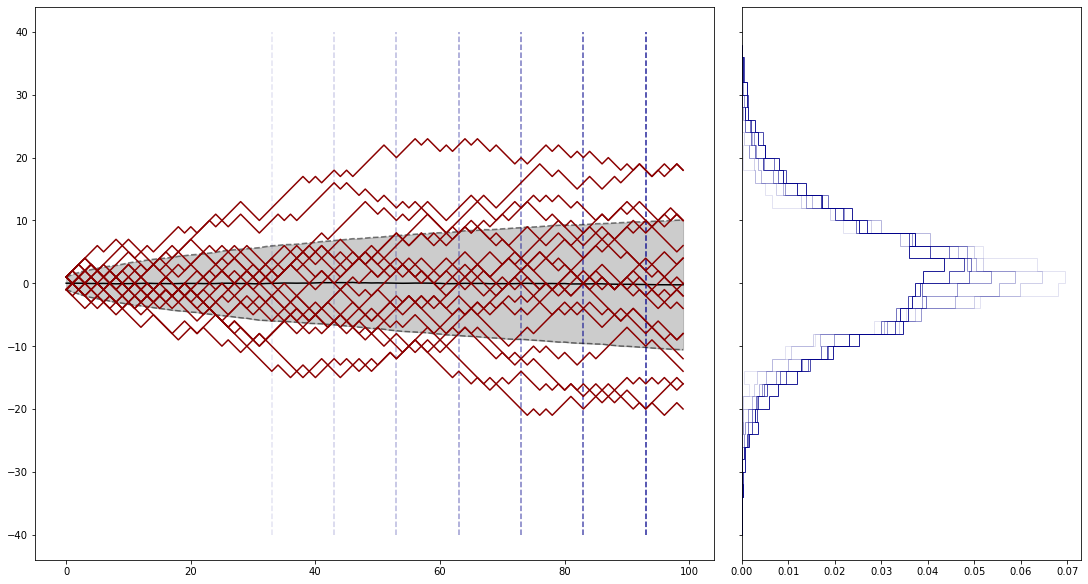

In [151]:
import matplotlib.pyplot as plt
import numpy as np

n_runs, n_steps = 2000, 100

runs = np.append(np.zeros(n_runs),np.random.randint(0,2,(n_runs,n_steps-1))*2-1).reshape(n_runs,n_steps).cumsum(axis=1)

means, stds = runs.mean(axis = 0), runs.std(axis = 0)

fig, axs = plt.subplots(1,2,figsize = (15,8), sharey = "row", gridspec_kw={'width_ratios': [2, 1]}, constrained_layout=True)


# axs[0].plot(runs.T,'.')
axs[0].plot(means, color = 'black')
axs[0].fill_between(np.arange(n_steps), means-stds, means+stds, color = 'black', alpha = 0.2)
axs[0].plot(np.arange(n_steps), means + stds, color = 'black', linestyle = '--', alpha = 0.5)
axs[0].plot(np.arange(n_steps), means - stds, color = 'black', linestyle = '--', alpha = 0.5)

axs[0].plot(runs.T[:,20:40], alpha = 1, color = "darkred")



for i in range(n_steps//3,n_steps, 10):
    axs[1].hist(runs[:,i], bins = [2*i for i in range(-20,20)], orientation="horizontal", density = True, alpha = (i/n_steps)**2, color = "darkblue",histtype = "step")
    axs[0].vlines(i, -40, 40, color = "darkblue", alpha = (i/n_steps)**2, linestyle = "--")  

# fig.tight_layout()
plt.show()